# Cap_1

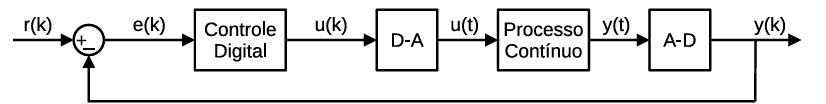

Este é um diagrama de blocos clássico de um **sistema de controle digital em malha fechada**.

**Componentes e Sinais:**

1.  **`r(k)` - Sinal de Referência (Setpoint)**
    *   **Descrição:** É o valor desejado ou o alvo para a saída do sistema. É o que você quer que o "Processo Contínuo" alcance ou mantenha.
    *   **Natureza:** É um sinal **discreto no tempo**, indicado pelo `(k)`. Isso significa que seu valor é definido em instantes de tempo específicos (k=0, 1, 2,... multiplicados por um período de amostragem $T_s$).
    *   **Exemplo:** Se o sistema controla a temperatura de um forno, `r(k)` poderia ser 200°C. Se controla a velocidade de um motor, `r(k)` poderia ser 1500 RPM.

2.  **Somador (Comparador)**
    *   **Descrição:** Este bloco calcula a diferença entre o sinal de referência `r(k)` e o sinal de saída medido e realimentado `y(k)`.
    *   **Operação:** `e(k) = r(k) - y(k)`
    *   **Saída:** O sinal de erro `e(k)`.

3.  **`e(k)` - Sinal de Erro**
    *   **Descrição:** Representa a discrepância entre o valor desejado e o valor atual do sistema.
    *   **Natureza:** Sinal discreto no tempo.
    *   **Importância:** É a entrada para o "Controle Digital". O objetivo do controlador é manipular o sistema para reduzir esse erro a zero (ou o mais próximo possível).

4.  **"Controle Digital" (Controlador Digital)**
    *   **Descrição:** Este é o "cérebro" do sistema de controle. É um algoritmo implementado em um dispositivo digital (como um microcontrolador, DSP, PLC ou computador).
    *   **Entrada:** Sinal de erro `e(k)`.
    *   **Saída:** Sinal de controle discreto `u(k)`.
    *   **Função:** Com base no erro `e(k)` (e possivelmente em seus valores passados ou na sua taxa de variação), o controlador calcula uma ação de controle `u(k)` apropriada para tentar corrigir o erro.
    *   **Exemplos de algoritmos:** PID (Proporcional-Integral-Derivativo), controladores baseados em modelo (como state-space), controle adaptativo, controle preditivo, lógica fuzzy, redes neurais, etc.

5.  **`u(k)` - Sinal de Controle (Discreto)**
    *   **Descrição:** É a saída do "Controle Digital". Representa a decisão ou o comando calculado pelo controlador.
    *   **Natureza:** Sinal discreto no tempo. É uma sequência de valores numéricos que o controlador envia em cada instante de amostragem.

6.  **"D-A" (Conversor Digital-Analógico / DAC - Digital-to-Analog Converter)**
    *   **Descrição:** Converte o sinal de controle digital `u(k)` em um sinal analógico contínuo no tempo `u(t)`.
    *   **Entrada:** Sinal de controle discreto `u(k)`.
    *   **Saída:** Sinal de controle analógico `u(t)`.
    *   **Função:** O "Processo Contínuo" (que geralmente é um sistema físico) opera com sinais analógicos. O DAC faz a ponte entre o mundo digital do controlador e o mundo analógico do processo.
    *   **Operação Comum:** Frequentemente, um DAC é acompanhado por um "Segurador de Ordem Zero" (Zero-Order Hold - ZOH), que mantém o valor analógico de saída constante durante um intervalo de amostragem, baseado no último valor digital recebido. Isso transforma a sequência de pulsos `u(k)` em um sinal em degraus `u(t)`.

7.  **`u(t)` - Sinal de Controle (Contínuo / Atuação)**
    *   **Descrição:** É o sinal analógico que efetivamente atua sobre o "Processo Contínuo".
    *   **Natureza:** Sinal contínuo no tempo.
    *   **Exemplo:** Se o processo é um motor, `u(t)` pode ser a tensão aplicada ao motor. Se for uma válvula, `u(t)` pode ser a pressão de ar que controla a abertura da válvula.

8.  **"Processo Contínuo" (Planta)**
    *   **Descrição:** É o sistema físico ou o processo que se deseja controlar.
    *   **Entrada:** Sinal de atuação analógico `u(t)`.
    *   **Saída:** Variável de processo `y(t)`.
    *   **Natureza:** Geralmente descrito por equações diferenciais, representando sua dinâmica contínua no tempo.
    *   **Exemplos:** Um motor elétrico, um tanque de aquecimento, um reator químico, um veículo, um braço robótico.

9.  **`y(t)` - Saída do Processo (Contínua)**
    *   **Descrição:** É a variável do processo que está sendo medida e controlada.
    *   **Natureza:** Sinal contínuo no tempo.
    *   **Exemplo:** A velocidade real do motor, a temperatura real do forno, a posição real do braço robótico.

10. **"A-D" (Conversor Analógico-Digital / ADC - Analog-to-Digital Converter)**
    *   **Descrição:** Converte o sinal analógico contínuo `y(t)` (a saída medida do processo) em um sinal digital discreto `y(k)`.
    *   **Entrada:** Sinal de saída analógico `y(t)`.
    *   **Saída:** Sinal de saída digital discreto `y(k)`.
    *   **Função:** O "Controle Digital" precisa de informações digitais para operar. O ADC faz a ponte entre o mundo analógico da medição do processo e o mundo digital do controlador.
    *   **Operação Comum:** Envolve duas etapas principais:
        *   **Amostragem (Sampling):** Medir o valor do sinal analógico `y(t)` em instantes de tempo discretos (geralmente a cada período de amostragem $T_s$).
        *   **Quantização (Quantization):** Representar cada amostra analógica por um valor digital de um conjunto finito de níveis. Isso introduz um erro de quantização.

11. **`y(k)` - Saída Medida/Realimentada (Discreta)**
    *   **Descrição:** É a representação digital da saída do processo, após a conversão A-D.
    *   **Natureza:** Sinal discreto no tempo.
    *   **Função:** Este sinal é realimentado (feedback) para o somador, onde será comparado com a referência `r(k)`.

**Malha de Realimentação (Feedback Loop):**

O caminho que leva `y(k)` de volta ao somador é a **malha de realimentação**. É o que torna este sistema um **sistema em malha fechada**.

*   **Vantagens da Malha Fechada:**
    *   **Correção de Erros:** Permite que o sistema corrija automaticamente desvios da referência causados por perturbações (distúrbios externos que afetam o processo) ou por incertezas no modelo do processo.
    *   **Estabilidade:** Pode ser projetado para ser estável mesmo que o processo em si seja instável em malha aberta.
    *   **Robustez:** Torna o sistema menos sensível a variações nos parâmetros do processo.
    *   **Desempenho:** Permite atingir um desempenho desejado (ex: tempo de resposta rápido, baixo sobressinal).

**Funcionamento Geral do Ciclo de Controle:**

1.  A referência `r(k)` (valor desejado) é definida.
2.  A saída atual do processo `y(k)` (valor medido e digitalizado) é subtraída da referência, gerando o erro `e(k)`.
3.  O "Controle Digital" processa o erro `e(k)` e calcula uma ação de controle `u(k)`.
4.  O conversor D-A transforma `u(k)` (digital) em `u(t)` (analógico).
5.  O sinal `u(t)` atua sobre o "Processo Contínuo".
6.  O processo responde, e sua saída `y(t)` (analógica) é medida.
7.  O conversor A-D transforma `y(t)` (analógico) em `y(k)` (digital).
8.  Este `y(k)` é realimentado, e o ciclo se repete, continuamente ajustando a ação de controle para minimizar o erro.

Este diagrama representa a arquitetura fundamental de muitos sistemas de controle modernos, desde simples termostatos digitais até complexos sistemas de controle de voo em aeronaves ou processos industriais.


O intervalo em que o conversor D-A permanece em hold até que toda essa sequência se repita para a chegada de uma nova conversão D-A, caracteriza as restrições de projeto e análise de controladores digitais e os diferencia da análise contínua. Nesse período em que o controlador permanece em hold, denominado período de amostragem, o valor do sinal de controle aplicado ao processo é mantido constante, enquanto o controlador digital não recebe novas informações da saída do processo (ou seja, não há atualização do erro nem da ação de controle). Assim, durante esse intervalo, o processo evolui livremente sob a última ação de controle calculada, sem correção baseada no erro atual — é como se a realimentação estivesse "congelada". Por isso, diz-se que, nesse curto período, o processo controlado está efetivamente em malha aberta (MA), pois não há ajuste contínuo da ação de controle em resposta à saída do sistema. Isso ressalta a importância de escolher um período de amostragem suficientemente pequeno para garantir desempenho e estabilidade adequados na malha de controle.

O período de amostragem também pode ser representado em função da frequência ou taxa de amostragem ($f_s = 1/T_s\,Hz$ ou $ω_s =2π/Ts\,rad/s$). Essas informaçõe são os elos entre os domínios de análise contínuo e discreto e permitem estabelecer os mapas de equivalência entre eles através de aproximações e a Transformada $Z$.Qualquer que seja a frequência $ω_s | ω_s ≥ 2w_i$, apenas as frequências $w_d ≤ ω_{Nyq}$ poderão ser armazenadas e reconstruídas. Também, do ponto de vista de um sistema de controle, wd ≤ ωNyq estabelece o limite espectral para o projeto do controlador. Ou seja, qualquer que seja a solução que se queira estabelecer com o sistema de controle projetado, tal solução deverá ficar necessariamente restrita a $w_d ≤ ω_{Nyq}$, pois as frequências acima da frequência de Nyquist não são amostradas.

Nota: Usamos a $f_s$ para digitalizar o modelo do sistema, por exemplo, sem que ocorra perdas.

Explorando a frase: Cada pólo determina uma frequência crítica do sistema.

**Interpretação no Diagrama de Bode (Magnitude):**
*   **Para ω < 1 rad/s:** Todos os três pólos têm `ω < |p_i|`. O sistema se comporta de forma relativamente plana (ganho DC é `G(0) = 1/(1*2*3) = 1/6`).
*   **Em ω = 1 rad/s:** O primeiro pólo (`s = -1`) começa a introduzir uma atenuação de -20 dB/década. A inclinação da curva de magnitude muda de 0 dB/década para -20 dB/década.
*   **Em ω = 2 rad/s:** O segundo pólo (`s = -2`) também começa a contribuir com sua atenuação. A inclinação total agora se torna -20 dB/década (do primeiro pólo) + (-20 dB/década do segundo pólo) = -40 dB/década.
*   **Em ω = 3 rad/s:** O terceiro pólo (`s = -3`) adiciona mais -20 dB/década. A inclinação total se torna -40 dB/década + (-20 dB/década) = -60 dB/década.

**Por que "Crítica"?**
Essas frequências são "críticas" porque:
1.  **Mudança de Comportamento:** Marcam os pontos onde o comportamento de filtragem do sistema muda. O sistema começa a atenuar sinais com mais intensidade acima dessas frequências.
2.  **Largura de Banda:** No contexto de sistemas de controle ou filtros, essas frequências ajudam a definir a largura de banda do sistema – a faixa de frequências que o sistema pode "passar" ou responder efetivamente antes que a atenuação se torne muito significativa. O pólo com a menor magnitude (mais próximo da origem no plano s, neste caso `s=-1` e `ω=1 rad/s`) é frequentemente o mais dominante na determinação da largura de banda de -3dB do sistema como um todo (se não houver zeros próximos).
3.  **Velocidade de Resposta no Tempo:** Os pólos também ditam a resposta temporal do sistema. Um pólo `s = -p` contribui com um termo `e^(-pt)` na resposta ao impulso. A "rapidez" com que esse termo decai é determinada por `p`. `1/p` é a constante de tempo. Frequências de canto mais altas (pólos mais distantes da origem no semiplano esquerdo) correspondem a constantes de tempo menores e, portanto, a respostas mais rápidas. A frequência crítica `ω = |p|` é o inverso da constante de tempo `τ = 1/|p|`.

Em resumo, cada pólo `s_i = -p_i` da função de transferência introduz uma "quebra" ou "canto" na resposta em frequência do sistema na frequência angular `ω = |p_i|`. Essas são frequências críticas porque nelas a capacidade do sistema de transmitir sinais (ou sua atenuação) começa a mudar significativamente, ditando a forma geral da resposta em frequência e, por consequência, características importantes do comportamento dinâmico do sistema.

Nota: Frequências acima de $f_s$ 2Hz sofrerão distoções, impossibilitando a reconstrução do sinal analógico a partir do sinal digital.

##### Regra Prática

* Para um Sistemade Controle em malha fechada: o critério prático proposto por Astrom e Wittenmark (2011) é de que a frequência de amostragem $ω_s$ seja ao menos o dobro do mínimo exigido pelo Teorema de Nyquist: $ω_s ⩾ 4ω_i$.

Digitalização de um modelo contínuo:Cada pólo determina uma frequência crítica do sistema.

#### Transformada Z

$F(z) = \mathcal{Z}[f(t)] = \mathcal{Z}[f(kT_s)] = \sum_{k=0}^{\infty} f(kT_s)z^{-k}$

#### Aproximação pelo Segurador de Ordem Zero 

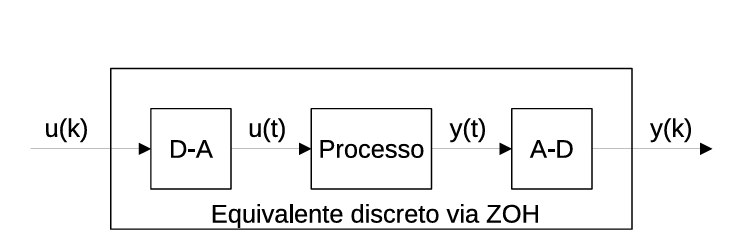

Este diagrama de blocos representa a forma como um **processo contínuo (ou planta) é visto por um controlador digital**. Ele mostra a interface entre o mundo digital (onde o sinal de controle `u(k)` é gerado) e o mundo analógico (onde o processo `Processo` opera e sua saída `y(t)` é medida), e como essa combinação é modelada como um **sistema discreto equivalente**.

Vamos detalhar cada parte:

1.  **`u(k)` - Sinal de Controle Discreto (Entrada do Sistema Equivalente)**
    
2.  **D-A (Conversor Digital-Analógico)**
    *   **Função:** Converte o sinal de controle digital `u(k)` em um sinal analógico `u(t)`.
    *   **Implicação do ZOH (Zero-Order Hold - Segurador de Ordem Zero):** A etiqueta "Equivalente discreto via ZOH" é crucial aqui. Ela nos diz que o conversor D-A não é apenas um idealizador, mas que ele implementa um **Segurador de Ordem Zero**.
        *   **Funcionamento do ZOH:** Quando o ZOH recebe um valor digital `u(k)` no instante de amostragem `kT` (onde `T` é o período de amostragem), ele converte esse valor para um nível analógico e **mantém esse nível constante** durante todo o intervalo de amostragem, ou seja, de `kT` até o próximo instante de amostragem `(k+1)T`.
        *   **Resultado:** O sinal `u(t)` na saída do D-A com ZOH é um sinal em **escada (staircase)**. Ele só muda de valor nos instantes de amostragem `kT`.

3.  **`u(t)` - Sinal de Atuação Contínuo**
    *   **Natureza:** Este é um sinal contínuo no tempo (embora seja constante por partes devido ao ZOH). É o sinal que efetivamente atua sobre o processo físico.
    *   **Relação com `u(k)`:** `u(t) = u(k)` para `kT ≤ t < (k+1)T`.

4.  **"Processo" (Planta Contínua)**
    *   **Natureza:** Este é o sistema físico ou o processo que está sendo controlado. Ele opera no domínio do tempo contínuo.
    *   **Modelo:** Geralmente é descrito por equações diferenciais ou por uma função de transferência no domínio de Laplace, `G_p(s)`.
    *   **Entrada:** Recebe o sinal de atuação contínuo `u(t)`.
    *   **Saída:** Produz uma saída contínua `y(t)`.

5.  **`y(t)` - Saída Contínua do Processo**
    *   **Natureza:** É a resposta do processo ao sinal de atuação `u(t)`. É uma variável física contínua (ex: temperatura, velocidade, posição).

6.  **A-D (Conversor Analógico-Digital)**
    *   **Função:** Converte o sinal analógico contínuo `y(t)` em um sinal digital discreto `y(k)`.
    *   **Operação principal:** Amostragem. O ADC "lê" o valor de `y(t)` em instantes de tempo discretos, geralmente sincronizados com o controlador digital (ou seja, a cada período de amostragem `T`).
    *   **Resultado:** `y(k) = y(kT)`. A saída `y(k)` é uma sequência de valores que representam as amostras da saída contínua do processo. (A quantização, outra parte do A-D, é geralmente omitida neste nível de modelagem para a derivação do equivalente discreto, ou seus efeitos são considerados separadamente).

7.  **`y(k)` - Saída Discreta do Sistema Equivalente**
    *   **Natureza:** Este é um sinal discreto no tempo, representando a saída do processo como vista pelo controlador digital.

**"Equivalente discreto via ZOH" (O Bloco Envolvente Maior)**

*   **Propósito:** O objetivo deste bloco maior é encontrar um **modelo matemático discreto no tempo** (geralmente uma função de transferência no domínio Z, `G(z)`) que relacione diretamente a entrada discreta `u(k)` com a saída discreta `y(k)`.
    *   `Y(z) = G(z)U(z)`
*   **Por que "via ZOH"?** A forma como o sinal digital `u(k)` é convertido para o sinal analógico `u(t)` (especificamente, o uso do ZOH) afeta significativamente a dinâmica do sistema discreto equivalente. Diferentes tipos de "seguradores" (como o First-Order Hold) levariam a um `G(z)` diferente. O ZOH é o mais comum na prática.
*   **Como é obtido?**
    Se o processo contínuo tem uma função de transferência `G_p(s)`, o equivalente discreto `G(z)` considerando um ZOH na entrada e um amostrador ideal na saída é dado por:
    `G(z) = (1 - z⁻¹) * Z{ G_p(s) / s }`
    Onde:
    *   `Z{...}` denota a Transformada Z.
    *   `G_p(s)/s` representa a resposta ao degrau do processo contínuo (o ZOH efetivamente aplica uma série de degraus ponderados).
    *   `(1 - z⁻¹)` é um fator que surge da natureza do ZOH.

A fórmula `G(z) = (1 - z⁻¹) Z[ G(s)/s ]` é a receita padrão e correta para converter uma função de transferência contínua `G(s)` para uma função de transferência discreta `G(z)` quando se usa um Segurador de Ordem Zero (ZOH) na interface D-A e um amostrador ideal na interface A-D.

*   O termo `G(s)/s` e sua Transformada Z lidam com a resposta do processo à natureza "degrau" do sinal vindo do ZOH.
*   O termo `(1 - z⁻¹)` ajusta isso para dar a resposta ao impulso discreta correta.
*   O resultado `G(z)` será inerentemente causal e, para processos físicos estritamente próprios, incluirá um atraso de pelo menos uma amostra, que pode ser explicitado como `z⁻¹` no numerador, como na forma `G(z) = B(z)z⁻¹ / A(z)`.

**Em resumo:**

O diagrama ilustra que, para projetar e analisar um controlador digital, precisamos de um modelo discreto do conjunto "Conversor D-A (com ZOH) + Processo Contínuo + Conversor A-D (amostrador)". Este modelo discreto equivalente, `G(z)`, captura como as sequências de entrada discretas `u(k)` se traduzem em sequências de saída discretas `y(k)`, levando em conta a dinâmica do processo contínuo e a forma como os sinais são convertidos entre os domínios digital e analógico, especificamente usando um segurador de ordem zero. Isso permite que toda a análise e projeto do controlador sejam feitos no domínio discreto.


#### Equação de diferenças

1.  **Definição:**
    *   Equações a diferenças são equações que descrevem a relação entre os valores atuais e passados (ou futuros) de um sinal de saída discreto `y(k)` e os valores atuais e passados (ou futuros) de um sinal de entrada discreto `u(k)`.
    *   Elas são a forma no domínio do tempo de descrever sistemas dinâmicos lineares e invariantes no tempo (LTI) discretos.

2.  **Relação com a Função de Transferência `G(z)`:**
    *   Uma função de transferência no domínio z, `G(z) = Y(z)/U(z)`, pode ser convertida diretamente em uma equação a diferenças.

3.  **Propriedade de Deslocamento no Tempo da Transformada Z:**
    *   A chave para converter da forma `G(z)` para a equação a diferenças é a propriedade de deslocamento no tempo:
        *   `z^(ns) F(z)` no domínio z corresponde a `f(k + ns)` no domínio do tempo (avanço de `ns` amostras).
        *   `z^(-ns) F(z)` no domínio z corresponde a `f(k - ns)` no domínio do tempo (atraso de `ns` amostras).
    *   Isso é assumindo condições iniciais nulas.

4.  **Obtenção da Equação a Diferenças (Forma em Atraso / Auto-Regressiva - Mais Comum para Implementação):**
    *   **Esta forma é crucial:** `y(k) = -a₁y(k-1) - a₂y(k-2) + b₀u(k-1) + b₁u(k-2)`
        Ela mostra que a **saída atual `y(k)`** é uma combinação linear de:
        *   **Saídas passadas:** `y(k-1), y(k-2)` (termos auto-regressivos)
        *   **Entradas passadas (ou atuais, dependendo da FT):** `u(k-1), u(k-2)`

6.  **Importância para Implementação Computacional:**
    *   A forma em atraso (Eq. 1.28) é "convidativa" para implementação em linguagens de programação.
    *   Para calcular `y(k)`, o programa precisa apenas armazenar os valores passados de `y` e `u`.
    *   Isso leva a um algoritmo iterativo, onde em cada passo `k`, o novo `y(k)` é calculado usando valores previamente armazenados.
    *   O exemplo de código MATLAB na Tabela 1 ilustra exatamente isso, implementando uma equação a diferenças de segunda ordem para simular um sistema.
Note:Code em .MAT
